In [3]:
import os
import sys
import uuid
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

In [4]:
nb_dir = '/'.join(os.getcwd().split('/')[:-1])
sys.path.append(nb_dir)
sys.path.append(os.path.split(nb_dir)[0])

import config
import src.utilities.app_context as app_context
app_context.init()

#path to craft model, weight can be pulled form the production bracnh of repo
config.CRAFT_MODEL_PATH= nb_dir + '/utilities/craft_pytorch/model/craft_mlt_25k.pth'
config.CRAFT_REFINE_MODEL_PATH = nb_dir + '/utilities/craft_pytorch/model/craft_refiner_CTW1500.pth'

from src.services.main import TextDetection

Loading weights of refiner from checkpoint (./model/craft_refiner_CTW1500.pth)


In [5]:
def draw_region(page_path,corrds,color= (255,0,0),thickness=5, save=False):
    
    if type(page_path) == str :  
        image = cv2.imread(page_path) 
    else :
        image = page_path
    for region in corrds :
            ground = region['boundingBox']['vertices']
            #start_point  = (ground[0]['x'],ground[0]['y'])
            #end_point = (ground[2]['x'],  ground[2]['y'])
            #cv2.rectangle(image, start_point, end_point, color,thickness)
            pts = []
            for pt in ground:
                pts.append([pt['x'] ,pt['y']])
            
            cv2.polylines(image, [np.array(pts)],True, color, thickness)
    plt.imshow(image)
    if save:
        cv2.imwrite(str(uuid.uuid1()) + '.png' , image)
        
    #return image


In [6]:
base_dir = '/home/dhiraj/Documents/Anuwad/anuvaad/anuvaad-etl/anuvaad-extractor/block-merger/src/notebooks/sample-data/input'

filename    = 'ncert.pdf'
file_format = 'PDF'
language    =  'en'

In [7]:
app_context.application_context = {
  "inputs": [
    {
      "file": {
        "identifier": "string",
        "name": filename,
        "format": file_format
      },
      "config": {
        "OCR": {
          "option": "HIGH_ACCURACY",
          "language": language
        }
      }
    }
  ]
}

In [8]:
resp = TextDetection(app_context,base_dir)

[2020-12-03 19:19:08,227] {loghandler.py:49} MainThread DEBUG in loghandler: Block merger starting processing {'inputs': [{'file': {'identifier': 'string', 'name': 'ncert.pdf', 'format': 'PDF'}, 'config': {'OCR': {'option': 'HIGH_ACCURACY', 'language': 'en'}}}]}
[2020-12-03 19:19:08,233] {loghandler.py:21} MainThread INFO in loghandler: created processing directories successfully /home/dhiraj/Documents/Anuwad/anuvaad/anuvaad-etl/anuvaad-extractor/block-merger/src/notebooks/sample-data/input/ncert_9eb25427-50f4-463d-92aa-89147ebb7a86
[2020-12-03 19:19:08,235] {loghandler.py:21} MainThread INFO in loghandler: filepath /home/dhiraj/Documents/Anuwad/anuvaad/anuvaad-etl/anuvaad-extractor/block-merger/src/notebooks/sample-data/input/ncert.pdf, working_dir /home/dhiraj/Documents/Anuwad/anuvaad/anuvaad-etl/anuvaad-extractor/block-merger/src/notebooks/sample-data/input/ncert_9eb25427-50f4-463d-92aa-89147ebb7a86
[2020-12-03 19:19:08,458] {loghandler.py:21} MainThread INFO in loghandler: Extracti

In [9]:
file_index = 0
page_index =0
to_check  = 'lines'

resp['rsp']['outputs'][file_index]['page_info']#[page_index][to_check]

['/home/dhiraj/Documents/Anuwad/anuvaad/anuvaad-etl/anuvaad-extractor/block-merger/src/notebooks/sample-data/input/ncert_9eb25427-50f4-463d-92aa-89147ebb7a86/images/ncert0001-1.jpg']

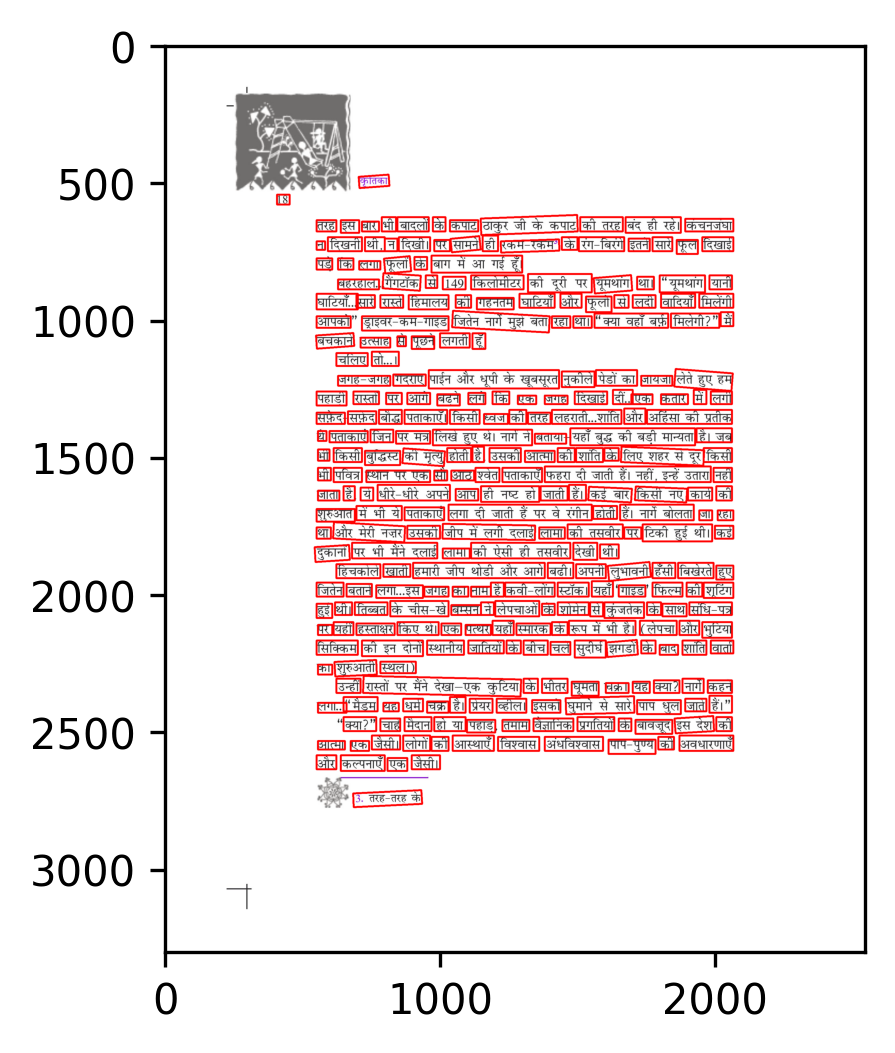

In [11]:
file_index = 0
page_index =0
to_check  = 'words'

regions    = resp['rsp']['outputs'][file_index]['pages'][page_index][to_check]
page_path = resp['rsp']['outputs'][file_index]['page_info'][page_index]


draw_region(page_path,regions)

In [1]:
page_path

NameError: name 'page_path' is not defined

In [2]:
page_image

NameError: name 'page_image' is not defined